In [1]:
import glob
import os
import re

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
from keras.callbacks import TensorBoard
from keras.layers.convolutional import Conv2D
from keras.layers.core import Activation, Dense, Dropout, Flatten
from keras.layers.pooling import MaxPool2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import plot_model

Using TensorFlow backend.


## osを使用する場合

In [3]:
path = './test/'
flist = os.listdir(path)

In [4]:
flist

['cat.1.jpg',
 'cat.2.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'dog.1.jpg',
 'dog.2.jpg',
 'dog.3.jpg',
 'dog.4.jpg',
 'dog.5.jpg',
 '__MACOSX']

## globを使用する場合

In [5]:
img_list = glob.glob(path + '/*' + ".jpg")

In [6]:
img_list 

['./test\\cat.1.jpg',
 './test\\cat.2.jpg',
 './test\\cat.3.jpg',
 './test\\cat.4.jpg',
 './test\\cat.5.jpg',
 './test\\dog.1.jpg',
 './test\\dog.2.jpg',
 './test\\dog.3.jpg',
 './test\\dog.4.jpg',
 './test\\dog.5.jpg']

## imageのロード、配列化、リサイズ、データセット作成

In [7]:
dog_img_array = np.empty((0, 224, 224, 3))
cat_img_array = np.empty((0, 224, 224, 3))

for img in img_list:

    # ファイル名に’dog’が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        #サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        #PIL.Image. Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        #正規化
        dog_img = dog_img / 255.0
        
        #axisの追加
        dog_img = dog_img.reshape((1, 224, 224, 3))
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis=0)
        
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)


In [8]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(5, 224, 224, 3)  cat_image:(5, 224, 224, 3)


In [9]:
print(dog_img_array[0].shape)

(224, 224, 3)


In [9]:
print(type(dog_img_array[0]))

<class 'numpy.ndarray'>


 ## イメージの表示

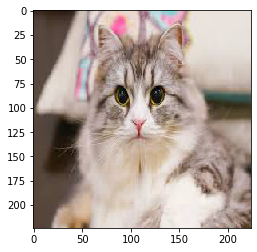

In [10]:
plt.imshow(cat_img_array[4])

In [11]:
'''

画像の中心を切り出し

https://note.nkmk.me/python-pillow-image-crop-trimming/

'''


def crop_center(pil_img, crop_width, crop_height):
    
    img_width, img_height = pil_img.size
    
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))


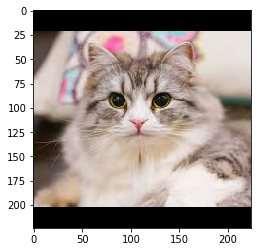

In [12]:
img = Image.open(img_list[4])

img_new = crop_center(img, 224, 224)

plt.imshow(img_new)

# 4  openCVの色形式

In [13]:
import cv2

## 4.1  グレースケール

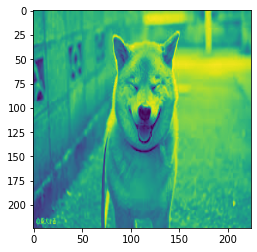

In [14]:
# 第二引数を0にするとグレースケールで読み込める
img = cv2.imread(img_list[5], 0)

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

plt.imshow(img)

## 4.2  BGRとRGB

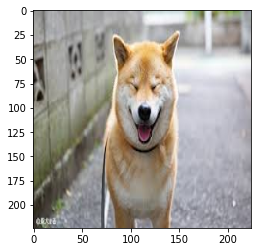

In [15]:
'''

なぜ彼らはOpenCVでBGRカラースペースを選択したのですか？

OpenCVの初期の開発者がBGRカラー形式を選択した理由は、
当時のBGRカラー形式がカメラメーカーとソフトウェアプロバイダーの間で人気があったためです。
たとえば、Windowsでは、COLORREFを使用して色の値を指定する場合、BGR形式0x00bbggrrを使用します。

BGRは歴史的な理由から選択されたものであり、今ではBGRと共存しなければなりません。
言い換えれば、BGRはOpenCVの馬のお尻です。

https://www.learnopencv.com/why-does-opencv-use-bgr-color-format/

'''


img = cv2.imread(img_list[5])
img = cv2.resize(img, (224, 224))

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# RGB

plt.imshow(img_rgb)

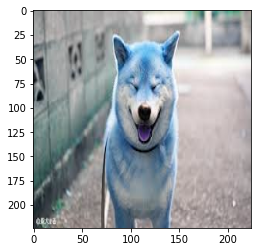

In [16]:
# BGR

plt.imshow(img)

# 【問題1】自作データセットでの分類の学習

In [17]:
print(dog_img_array)

[[[[0.52156863 0.52156863 0.51372549]
   [0.5372549  0.5372549  0.52941176]
   [0.58039216 0.58039216 0.57254902]
   ...
   [0.57647059 0.57254902 0.62745098]
   [0.58039216 0.60392157 0.65882353]
   [0.58823529 0.61176471 0.66666667]]

  [[0.54117647 0.54117647 0.53333333]
   [0.54901961 0.54901961 0.54117647]
   [0.58431373 0.58431373 0.57647059]
   ...
   [0.58431373 0.58431373 0.63137255]
   [0.58823529 0.61176471 0.65882353]
   [0.59607843 0.61960784 0.66666667]]

  [[0.54117647 0.54117647 0.53333333]
   [0.54901961 0.54901961 0.54117647]
   [0.58431373 0.58431373 0.57647059]
   ...
   [0.58431373 0.58431373 0.63137255]
   [0.58823529 0.61176471 0.65882353]
   [0.59607843 0.61960784 0.66666667]]

  ...

  [[0.25098039 0.22352941 0.2       ]
   [0.20784314 0.18039216 0.15686275]
   [0.25098039 0.23529412 0.2       ]
   ...
   [0.56470588 0.55686275 0.6       ]
   [0.52156863 0.51372549 0.55686275]
   [0.49411765 0.48627451 0.52941176]]

  [[0.25098039 0.22352941 0.2       ]
   [0.2

In [18]:
y = np.array([0,0,0,0,0,1,1,1,1,1])
print(y)

[0 0 0 0 0 1 1 1 1 1]


In [19]:
X = np.concatenate((dog_img_array, cat_img_array), axis=0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
print(X_train.shape)
print(y_train)

(8, 224, 224, 3)
[0 1 0 1 1 0 0 1]


## one-hot

In [22]:
from keras.utils import np_utils

one_hot_y_train = np_utils.to_categorical(y_train)
one_hot_y_test = np_utils.to_categorical(y_test)

In [23]:
print(one_hot_y_train)

[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [24]:
import tensorflow as tf
from keras import backend as K
from keras.layers import (Activation, Conv2D, Dense, Dropout, Flatten,
                          MaxPooling2D)
from keras.models import Model, Sequential
import keras

In [25]:
num_classes = 2
img_height, img_width = 224, 224

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


W0919 10:38:49.585793 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0919 10:38:49.607735 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0919 10:38:49.610728 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0919 10:38:49.639650 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0919 10:38:49.643639 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Ana

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 64)        0         
__________

In [26]:
model.compile(loss='binary_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])

W0919 10:38:49.749153 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0919 10:38:49.753142 15388 deprecation_wrapper.py:119] From C:\Users\ykenk\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0919 10:38:49.758133 15388 deprecation.py:323] From C:\Users\ykenk\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [28]:
history = model.fit(X_train, one_hot_y_train,
                    batch_size=1,
                    epochs=30,
                    verbose=1
                   )

Epoch 1/30
8/8 [==============================] - 7s 931ms/step - loss: 8.0151 - acc: 0.5000
Epoch 2/30
8/8 [==============================] - 7s 856ms/step - loss: 8.0151 - acc: 0.5000
Epoch 3/30
8/8 [==============================] - 7s 865ms/step - loss: 8.0151 - acc: 0.5000
Epoch 4/30
8/8 [==============================] - 7s 852ms/step - loss: 8.0151 - acc: 0.5000
Epoch 5/30
8/8 [==============================] - 7s 873ms/step - loss: 8.0151 - acc: 0.5000
Epoch 6/30
8/8 [==============================] - 7s 907ms/step - loss: 8.0151 - acc: 0.5000
Epoch 7/30
8/8 [==============================] - 7s 911ms/step - loss: 8.0151 - acc: 0.5000
Epoch 8/30
8/8 [==============================] - 7s 879ms/step - loss: 8.0151 - acc: 0.5000
Epoch 9/30
8/8 [==============================] - 7s 916ms/step - loss: 8.0151 - acc: 0.5000
Epoch 10/30
8/8 [==============================] - 7s 893ms/step - loss: 8.0151 - acc: 0.5000
Epoch 11/30
8/8 [==============================] - 7s 892ms/step - lo

# 【問題2】分類データセットに対するデータ拡張

In [70]:
import keras.preprocessing.image as Image
from keras.preprocessing import image as Image
from keras.preprocessing.image import (ImageDataGenerator, array_to_img,
                                       img_to_array, load_img, save_img)

In [120]:
num_classes = 2
img_height, img_width = 224, 224

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 224, 224, 32)      896       
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 224, 224, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 112, 112, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 112, 112, 64)      18496     
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 56, 56, 64)        0         
__________

In [121]:
model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),
                  metrics=['accuracy'])

In [131]:
datagen = Image.ImageDataGenerator(
            featurewise_center = False,
            samplewise_center = False,
            featurewise_std_normalization = False,
            samplewise_std_normalization = False,
            zca_whitening = False,
            rotation_range = 30,
            width_shift_range = 0.3,
            height_shift_range = 0.3,
            horizontal_flip = True,
            vertical_flip = False,
            validation_split = 0.2
        )

In [132]:
train_generator = datagen.flow_from_directory(
            './train_dir/',
            target_size=(224,224),
            batch_size=1,
            class_mode='categorical',
            subset = "training" 
        )

Found 8 images belonging to 2 classes.


In [133]:
val_generator = datagen.flow_from_directory(
            './train_dir/',
            target_size=(224,224),
            batch_size=1,
            class_mode='categorical',
            subset = "validation"
        )

Found 2 images belonging to 2 classes.


In [134]:
# クラス ID とクラス名の対応関係
print(train_generator.class_indices)

{'cat': 0, 'dog': 1}


In [135]:
val_generator.samples

2

In [137]:
# 学習する。
num_epochs = 30
batch_size = 1

history = model.fit_generator(
    train_generator,
    steps_per_epoch=50,
    validation_data=val_generator,
    validation_steps=50,
    epochs=num_epochs,
)

Epoch 1/30
50/50 [==============================] - 46s 919ms/step - loss: 7.7367 - acc: 0.5200 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/30
50/50 [==============================] - 47s 936ms/step - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/30
50/50 [==============================] - 47s 933ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 4/30
50/50 [==============================] - 48s 965ms/step - loss: 8.3814 - acc: 0.4800 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/30
50/50 [==============================] - 48s 952ms/step - loss: 7.7367 - acc: 0.5200 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 6/30
50/50 [==============================] - 46s 922ms/step - loss: 8.0590 - acc: 0.5000 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 7/30
50/50 [==============================] - 47s 941ms/step - loss: 8.3814 - acc: 0.4800 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 8/30
50/50 [==============================] - 46s 920ms/step - 

# 【問題3】物体検出データセットの用意

# 【問題4】物体検出データセットに対するデータ拡張

In [8]:
from urllib.request import urlopen
import cv2
import xml.etree.ElementTree as ET

In [3]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [4]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## For detection tasks you must specify bbox_params with at least format field.¶
Available formats are: coco, pascal_voc.

The coco format of a bounding box looks like [x_min, y_min, width, height], e.g. [97, 12, 150, 200].

The pascal_voc format of a bounding box looks like [x_min, y_min, x_max, y_max], e.g. [97, 12, 247, 212].

If you have labels in separate fields - don't forget to specify their names

使用可能な形式は、coco、pascal_vocです。 境界ボックスのココ形式は、[x_min、y_min、width、height]のようになります。 [97、12、150、200]。 境界ボックスのpascal_voc形式は、[x_min、y_min、x_max、y_max]のようになります。 [97、12、247、212]。 別々のフィールドにラベルがある場合-名前を[]に指定することを忘れないでください：

In [ ]:
def get_aug(aug, min_area=0., min_visibility=0.):
    
    return Compose(aug, bbox_params=BboxParams(format='pascal_voc', min_area=min_area, 
                                               min_visibility=min_visibility, label_fields=['category_id']))

In [ ]:
image = download_image('http://images.cocodataset.org/train2017/000000386298.jpg')

In [ ]:
# Annotations for image 386298 from COCO http://cocodataset.org/#explore?id=386298
annotations = {'image': image, 'bboxes': [[366.7, 80.84, 132.8, 181.84], [5.66, 138.95, 147.09, 164.88]], 'category_id': [18, 17]}
category_id_to_name = {17: 'cat', 18: 'dog'}

## Original image 

In [ ]:
visualize(annotations, category_id_to_name)

## Few simple cases

In [ ]:
aug = get_aug([VerticalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

In [ ]:
aug = get_aug([HorizontalFlip(p=1)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name

In [ ]:
aug = get_aug([Resize(p=1, height=256, width=256)])
augmented = aug(**annotations)
visualize(augmented, category_id_to_name)

# すいません、現状ここまでです。